In [2]:
# -*- coding:utf-8 -*-
# @Python Version: 3.7
# @Time: 2020/6/12 00:09
# @Author: Michael Ming
# @Website: https://michael.blog.csdn.net/
# @File: employee_satisfaction_pipeline.ipynb
# @Reference:

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor']=(1,1,1,1) # pycharm 绘图白底，看得清坐标
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import *
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

10


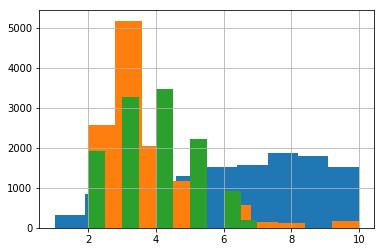

In [4]:
# 读取数据
tr_data = pd.read_csv(r"D:\Softwares\gitcode\dnn\chenmingming\competition\Employee_Satisfaction\train.csv",index_col='id')
X_test = pd.read_csv(r"D:\Softwares\gitcode\dnn\chenmingming\competition\Employee_Satisfaction\test.csv",index_col='id') # 不含标签
print(len(tr_data.columns))
tr_data.head(10)
tr_data['satisfaction_level_cat'] = np.ceil(tr_data['satisfaction_level']*100/10)
tr_data['satisfaction_level_cat'].hist() # 满意度分成10个等级
tr_data['time_spend_company'].hist()
tr_data['number_project'].hist()

In [5]:
tr_data.corr()
# sns.regplot(x=tr_data.index, y=tr_data['satisfaction_level'])
from sklearn.model_selection import StratifiedShuffleSplit
splt = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
for train_idx, test_idx in splt.split(tr_data, tr_data['satisfaction_level_cat']):
    strat_train_set = tr_data.loc[train_idx]
    strat_test_set = tr_data.loc[test_idx]

for set in (strat_train_set, strat_test_set):
    set.drop('satisfaction_level_cat',axis=1,inplace=True)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  import sys


In [6]:
corr_mat = strat_train_set.corr()
corr_mat['satisfaction_level'].sort_values(ascending=False)

satisfaction_level       1.000000
last_evaluation          0.085759
Work_accident            0.041254
promotion_last_5years    0.011735
average_monthly_hours   -0.012339
number_project          -0.135155
time_spend_company      -0.149982
Name: satisfaction_level, dtype: float64

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
number_project_idx, time_spend_company_idx = 1, 3
class addfeature(BaseEstimator, TransformerMixin):
    def __init__(self, add_project_perYear = True):
        self.add_project_perYear = add_project_perYear
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        if self.add_project_perYear:
            projects_perYear = X[:,number_project_idx]/X[:,time_spend_company_idx]
            return np.c_[X,projects_perYear]
        else:
            return X
add_attri = addfeature(add_project_perYear=True)
strat_train_set_extra_attri = add_attri.transform(strat_train_set.values)
strat_train_set_extra_attri.shape
strat_train_set_extra_attri = pd.DataFrame(strat_train_set_extra_attri,columns=s)

SyntaxError: invalid syntax (<ipython-input-7-9cab65136fa7>, line 17)

In [ ]:
train_num = strat_train_set_extra_attri.

In [ ]:
y_pred_test = model1.predict(X_test_final)
result = pd.DataFrame()
result['id'] = X_test.index
result['satisfaction_level'] = y_pred_test
result.to_csv('lr_with_num_scale.csv',index=False)